Data Cleaning for Telecom Data in Python

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

Read the telecom_churn.csv file that is to be cleaned and the supporting churn_dict.csv file

In [3]:
telecom_df = pd.read_csv(r"C:\Users\eliza\OneDrive\Desktop\Python Training\telecom_churn.csv")  
churn_dict_df = pd.read_csv(r"C:\Users\eliza\OneDrive\Desktop\Python Training\churn_dict.csv") 

 Display the first five rows of telecom_df

In [4]:
telecom_df.head() 

,GENDER_CD,EDUCATION_CD,OCCUPATION_CAT_CD,SUBS_TENURE,OB_CALL_INTL_DUR_BASE_1,OB_CALL_INTL_DUR_BASE_2,OB_CALL_INTL_DUR_BASE_3,OB_CALL_INTL_DUR_BASE_4,OB_CALL_INTL_DUR_BASE_5,OB_CALL_INTL_DUR_BASE_6,...,PROPN_IB_LOW_DUR,RATIO_SPEC_SMS_SMS_REV_AMT,PCT_CHNG_SUSPENDED_CNT,PCT_CHNG_BILL_AMT,CUST_SUBS_ID,TOT_REV_AMT,TOT_PROF_AMT,CUST_ID,name,CHURN_FLG
0,M,2.0,NaN,198,16.8,16.3,15.2,18.0,15.4,13.9,...,0.739130,0.000000,0.0,0.955526,1,NaN,NaN,5198,Amy H Thomas,0
1,M,1.0,NaN,114,2.9,4.6,19.0,16.1,11.6,13.6,...,1.576923,1.563786,0.0,0.938199,2,99.0,99.0,752,Ignatius T Lyod,1
2,M,2.0,24.0,114,2.5,4.7,18.5,18.8,19.4,16.8,...,1.538462,4.108014,5000.0,0.720440,3,47.0,47.0,3501,Leo C Wood,1
3,M,1.0,87.0,228,16.0,15.8,15.5,17.4,11.7,11.0,...,1.655172,0.000000,0.0,0.880032,4,NaN,NaN,5406,Augustine X Turner,0
4,F,4.0,22.0,168,14.6,14.1,16.3,13.5,13.4,14.6,...,1.733333,0.000000,0.0,1.282770,5,97.0,97.0,6115,Demie A Shaw,1


Display the last five rows of telecom_df

In [57]:
telecom_df.tail()   

,GENDER_CD,EDUCATION_CD,OCCUPATION_CAT_CD,SUBS_TENURE,OB_CALL_INTL_DUR_BASE_1,OB_CALL_INTL_DUR_BASE_2,OB_CALL_INTL_DUR_BASE_3,OB_CALL_INTL_DUR_BASE_4,OB_CALL_INTL_DUR_BASE_5,OB_CALL_INTL_DUR_BASE_6,...,PROPN_IB_LOW_DUR,RATIO_SPEC_SMS_SMS_REV_AMT,PCT_CHNG_SUSPENDED_CNT,PCT_CHNG_BILL_AMT,CUST_SUBS_ID,TOT_REV_AMT,TOT_PROF_AMT,CUST_ID,name,CHURN_FLG
13191,F,3.0,79.0,114,15.1,15.9,16.8,13.7,16.3,19.0,...,0.615385,0.0,0.0,0.932459,13192,NaN,NaN,1050,Bill Y Elder,0
13192,M,NaN,NaN,120,19.9,14.4,17.0,16.9,14.7,11.8,...,1.162791,0.0,0.0,0.849638,13193,NaN,NaN,6232,Paul G Whitehall,0
13193,M,1.0,NaN,132,17.7,12.5,14.9,17.8,19.6,13.4,...,0.216216,0.0,0.0,0.767135,13194,7.0,7.0,4489,David K Mcrae,0
13194,F,3.0,NaN,156,11.1,19.3,11.8,15.7,11.0,16.7,...,0.557377,0.0,0.0,0.631247,13195,5.0,5.0,2076,Clarke R Lee,0
13195,M,1.0,NaN,132,11.5,12.8,11.3,18.0,11.4,14.5,...,0.777778,0.0,0.0,1.584000,13196,NaN,NaN,2342,Clements F Carson,0


Get the information on the data frame telecom_df regarding range index ,number of columns and corresponding data types

In [5]:
telecom_df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13196 entries, 0 to 13195
Columns: 108 entries, GENDER_CD to CHURN_FLG
dtypes: float64(46), int64(60), object(2)
memory usage: 10.9+ MB


Descriptive Statistics-Describe the dataframe telecom_df - For each column, describe Number of values, Mean, Standard deviation, Minimum, 25% Quartile, 75% quartile and Maximum values 

In [6]:
telecom_df.describe()  

,EDUCATION_CD,OCCUPATION_CAT_CD,SUBS_TENURE,OB_CALL_INTL_DUR_BASE_1,OB_CALL_INTL_DUR_BASE_2,OB_CALL_INTL_DUR_BASE_3,OB_CALL_INTL_DUR_BASE_4,OB_CALL_INTL_DUR_BASE_5,OB_CALL_INTL_DUR_BASE_6,OB_CALL_NAT_ROAM_CNT_BASE_1,...,PCT_CHNG_OB_WAP_CNT,PROPN_IB_LOW_DUR,RATIO_SPEC_SMS_SMS_REV_AMT,PCT_CHNG_SUSPENDED_CNT,PCT_CHNG_BILL_AMT,CUST_SUBS_ID,TOT_REV_AMT,TOT_PROF_AMT,CUST_ID,CHURN_FLG
count,10295.000000,6513.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,...,13196.000000,13196.000000,1.319600e+04,13196.000000,13196.000000,13196.000000,4170.000000,4170.000000,13196.000000,13196.000000
mean,1.638757,34.995394,119.854956,14.765944,14.866619,15.507752,15.486564,15.515080,15.492331,7.382972,...,0.962725,0.958707,1.107613e+05,181.500177,1.134070,6598.500000,22.214628,22.214628,3899.567824,0.082677
std,0.771904,25.857053,27.139618,3.688206,3.531747,2.595205,2.587189,2.609266,2.608298,1.844103,...,0.220144,0.686199,6.870144e+05,1042.495817,0.432525,3809.501411,29.721773,29.721773,2236.650159,0.275403
min,1.000000,1.000000,24.000000,2.000000,3.000000,11.000000,11.000000,11.000000,11.000000,1.000000,...,0.150782,0.000000,0.000000e+00,0.000000,0.245428,1.000000,-3.000000,-3.000000,1.000000,0.000000
25%,1.000000,12.000000,102.000000,12.700000,12.800000,13.300000,13.300000,13.300000,13.200000,6.350000,...,0.873424,0.550543,0.000000e+00,0.000000,0.823936,3299.750000,4.000000,4.000000,1971.750000,0.000000
50%,2.000000,27.000000,120.000000,15.100000,15.200000,15.500000,15.500000,15.500000,15.400000,7.550000,...,0.984957,0.823529,0.000000e+00,0.000000,1.087538,6598.500000,10.000000,10.000000,3898.500000,0.000000
75%,2.000000,54.000000,138.000000,17.500000,17.600000,17.700000,17.700000,17.800000,17.800000,8.750000,...,1.095395,1.200000,0.000000e+00,0.000000,1.373761,9897.250000,17.000000,17.000000,5833.250000,0.000000
max,7.000000,99.000000,240.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,10.000000,...,1.706667,26.000000,6.905000e+06,10000.000000,5.069565,13196.000000,100.000000,100.000000,7800.000000,1.000000


Get the column names for telecom_df dataframe

In [7]:
telecom_df.columns  

Index(['GENDER_CD', 'EDUCATION_CD', 'OCCUPATION_CAT_CD', 'SUBS_TENURE',
       'OB_CALL_INTL_DUR_BASE_1', 'OB_CALL_INTL_DUR_BASE_2',
       'OB_CALL_INTL_DUR_BASE_3', 'OB_CALL_INTL_DUR_BASE_4',
       'OB_CALL_INTL_DUR_BASE_5', 'OB_CALL_INTL_DUR_BASE_6',
       ...
       'PROPN_IB_LOW_DUR', 'RATIO_SPEC_SMS_SMS_REV_AMT',
       'PCT_CHNG_SUSPENDED_CNT', 'PCT_CHNG_BILL_AMT', 'CUST_SUBS_ID',
       'TOT_REV_AMT', 'TOT_PROF_AMT', 'CUST_ID', 'name', 'CHURN_FLG'],
      dtype='object', length=108)

Check if there are any columns with null values

In [8]:
telecom_df.columns[telecom_df.isnull().any()]

Index(['GENDER_CD', 'EDUCATION_CD', 'OCCUPATION_CAT_CD', 'TOT_REV_AMT',
       'TOT_PROF_AMT'],
      dtype='object')

Copy the columns with null to a new data frame telecom_df_withnull

In [9]:

telecom_df_withnull = telecom_df[["GENDER_CD","EDUCATION_CD","OCCUPATION_CAT_CD","TOT_REV_AMT","TOT_PROF_AMT"]]
telecom_df_withnull

,GENDER_CD,EDUCATION_CD,OCCUPATION_CAT_CD,TOT_REV_AMT,TOT_PROF_AMT
0,M,2.0,NaN,NaN,NaN
1,M,1.0,NaN,99.0,99.0
2,M,2.0,24.0,47.0,47.0
3,M,1.0,87.0,NaN,NaN
4,F,4.0,22.0,97.0,97.0
...,...,...,...,...,...
13191,F,3.0,79.0,NaN,NaN
13192,M,NaN,NaN,NaN,NaN
13193,M,1.0,NaN,7.0,7.0
13194,F,3.0,NaN,5.0,5.0


Display the summ of null values in each column in descending order

In [10]:

telecom_df_withnull.isnull().sum().sort_values(ascending = False)

TOT_REV_AMT          9026
TOT_PROF_AMT         9026
OCCUPATION_CAT_CD    6683
EDUCATION_CD         2901
GENDER_CD              96
dtype: int64

Check for the string type columns

In [11]:
 
churn_dict_df.loc[churn_dict_df["Type"] == "Char"]


,Unnamed: 0,Variable,Type,Description
0,1,GENDER_CD,Char,Gender code
1,2,EDUCATION_CD,Char,Education code
2,3,OCCUPATION_CAT_CD,Char,Standard occupation Code
59,60,CUST_SEG_CD,Char,Customer segment code
75,76,BARRING_REASON_CD,Char,Barring type code
84,85,CURR_PRICE_PLAN_CD,Char,Current price plan code
85,86,CURR_PAY_METHOD_CD,Char,Current payment method code
86,87,POSTAL_CD,Char,Client Post Code
87,88,PREV_PRICE_PLAN_CD,Char,Previous Pricing Plan Code
90,91,MOST_FREQ_COMPLAINT_CD,Char,Most frequent complaint code


Check the details on number of each datatypes. 96 numeric and 12 categoric

In [12]:

churn_dict_df.Type.value_counts()

Num     96
Char    12
Name: Type, dtype: int64

Extract the numeric data from telecom_df to a new data frame telecom_df_numdata

In [13]:

telecom_df_numdata = telecom_df.iloc[:,churn_dict_df.loc[churn_dict_df["Type"] == 'Num'].index]
telecom_df_numdata.describe()

,SUBS_TENURE,OB_CALL_INTL_DUR_BASE_1,OB_CALL_INTL_DUR_BASE_2,OB_CALL_INTL_DUR_BASE_3,OB_CALL_INTL_DUR_BASE_4,OB_CALL_INTL_DUR_BASE_5,OB_CALL_INTL_DUR_BASE_6,OB_CALL_NAT_ROAM_CNT_BASE_1,OB_CALL_NAT_ROAM_CNT_BASE_2,OB_CALL_NAT_ROAM_CNT_BASE_3,...,PCT_CHNG_OB_LOC_SMS_CNT,PCT_CHNG_OB_WAP_CNT,PROPN_IB_LOW_DUR,RATIO_SPEC_SMS_SMS_REV_AMT,PCT_CHNG_SUSPENDED_CNT,PCT_CHNG_BILL_AMT,CUST_SUBS_ID,TOT_REV_AMT,TOT_PROF_AMT,CUST_ID
count,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,...,13196.000000,13196.000000,13196.000000,1.319600e+04,13196.000000,13196.000000,13196.000000,4170.000000,4170.000000,13196.000000
mean,119.854956,14.765944,14.866619,15.507752,15.486564,15.515080,15.492331,7.382972,7.433309,7.753876,...,0.962725,0.962725,0.958707,1.107613e+05,181.500177,1.134070,6598.500000,22.214628,22.214628,3899.567824
std,27.139618,3.688206,3.531747,2.595205,2.587189,2.609266,2.608298,1.844103,1.765874,1.297602,...,0.220144,0.220144,0.686199,6.870144e+05,1042.495817,0.432525,3809.501411,29.721773,29.721773,2236.650159
min,24.000000,2.000000,3.000000,11.000000,11.000000,11.000000,11.000000,1.000000,1.500000,5.500000,...,0.150782,0.150782,0.000000,0.000000e+00,0.000000,0.245428,1.000000,-3.000000,-3.000000,1.000000
25%,102.000000,12.700000,12.800000,13.300000,13.300000,13.300000,13.200000,6.350000,6.400000,6.650000,...,0.873424,0.873424,0.550543,0.000000e+00,0.000000,0.823936,3299.750000,4.000000,4.000000,1971.750000
50%,120.000000,15.100000,15.200000,15.500000,15.500000,15.500000,15.400000,7.550000,7.600000,7.750000,...,0.984957,0.984957,0.823529,0.000000e+00,0.000000,1.087538,6598.500000,10.000000,10.000000,3898.500000
75%,138.000000,17.500000,17.600000,17.700000,17.700000,17.800000,17.800000,8.750000,8.800000,8.850000,...,1.095395,1.095395,1.200000,0.000000e+00,0.000000,1.373761,9897.250000,17.000000,17.000000,5833.250000
max,240.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,10.000000,10.000000,10.000000,...,1.706667,1.706667,26.000000,6.905000e+06,10000.000000,5.069565,13196.000000,100.000000,100.000000,7800.000000


Extract the categorical data to a new data frame telecom_df_categdata

In [14]:
telecom_df_categdata = telecom_df[["GENDER_CD","EDUCATION_CD","OCCUPATION_CAT_CD","CUST_SEG_CD","BARRING_REASON_CD","CURR_PRICE_PLAN_CD",
                                  "CURR_PAY_METHOD_CD","POSTAL_CD","PREV_PRICE_PLAN_CD","MOST_FREQ_COMPLAINT_CD","name","CHURN_FLG"]]

Check for null values in categorical data

In [15]:
telecom_df_categdata.isnull().sum()

GENDER_CD                   96
EDUCATION_CD              2901
OCCUPATION_CAT_CD         6683
CUST_SEG_CD                  0
BARRING_REASON_CD            0
CURR_PRICE_PLAN_CD           0
CURR_PAY_METHOD_CD           0
POSTAL_CD                    0
PREV_PRICE_PLAN_CD           0
MOST_FREQ_COMPLAINT_CD       0
name                         0
CHURN_FLG                    0
dtype: int64

In [16]:
### Check for the consistency and correctness of gender data 
telecom_df_categdata['GENDER_CD'].value_counts()


M    8534
F    4566
Name: GENDER_CD, dtype: int64

Check for consistency and correctness of values in EDUCATION_CD

In [18]:
telecom_df_categdata['EDUCATION_CD'].value_counts().sort_index()

1.0    4817
2.0    4870
3.0     330
4.0     143
5.0      60
6.0      73
7.0       2
Name: EDUCATION_CD, dtype: int64

Check for consistency and correctness of values in OCCUPATION_CAT_CD

In [19]:
telecom_df_categdata['OCCUPATION_CAT_CD'].value_counts()

10.0    702
1.0     573
21.0    334
12.0    325
87.0    265
       ... 
69.0      2
27.0      2
83.0      1
93.0      1
42.0      1
Name: OCCUPATION_CAT_CD, Length: 77, dtype: int64

Check for consistency and correctness of values in CUST_SEG_CD

In [20]:
telecom_df_categdata['CUST_SEG_CD'].value_counts()

2     1198
1     1177
4     1161
3     1142
0     1099
9     1091
8     1089
6     1077
10    1055
5     1049
11    1029
7     1029
Name: CUST_SEG_CD, dtype: int64

Check for consistency and correctness of values in BARRING_REASON_CD

In [21]:
telecom_df_categdata['BARRING_REASON_CD'].value_counts()

0    3403
2    3358
3    3223
1    3212
Name: BARRING_REASON_CD, dtype: int64

Check for consistency and correctness of values in CURR_PRICE_PLAN_CD

In [22]:
telecom_df_categdata['CURR_PRICE_PLAN_CD'].value_counts()

5     971
6     958
7     950
11    891
9     883
8     883
4     874
10    871
12    867
13    827
14    776
15    727
16    715
17    690
3     415
2     324
1     319
0     255
Name: CURR_PRICE_PLAN_CD, dtype: int64

Check for consistency and correctness of values in CURR_PAY_METHOD_CD

In [23]:
telecom_df_categdata['CURR_PAY_METHOD_CD'].value_counts().sort_index()

0     224
1     296
2     312
3     343
4     122
5     675
6     709
7     697
8     728
9     766
10    731
11    747
12    720
13    716
14    697
15    646
16    604
17    613
18    583
19    602
20    567
21    545
22    492
23     39
24     22
Name: CURR_PAY_METHOD_CD, dtype: int64

Check for consistency and correctness of values in PREV_PRICE_PLAN_CD

In [24]:
telecom_df_categdata['PREV_PRICE_PLAN_CD'].value_counts().sort_index()

0     223
1     271
2     825
3     842
4     624
5     635
6     586
7     625
8     595
9     616
10    589
11    607
12    645
13    596
14    619
15    611
16    577
17    626
18    529
19    476
20    506
21    470
22    495
23      1
24      7
Name: PREV_PRICE_PLAN_CD, dtype: int64

Check for consistency and correctness of values in MOST_FREQ_COMPLAINT_CD

In [25]:
telecom_df_categdata['MOST_FREQ_COMPLAINT_CD'].value_counts().sort_index()

0     3675
1      482
2      513
3      452
4      498
5      508
6      493
7      467
8      492
9      537
10     469
11     508
12     505
13     512
14     531
15     514
16     464
17     389
18     397
19     415
20     375
Name: MOST_FREQ_COMPLAINT_CD, dtype: int64

Check for consistency and correctness of values in name

In [26]:
telecom_df_categdata['name'].value_counts()

Amy H Thomas         1
Hillary R Mcrae      1
Steve B Richards     1
Colin L Dsilva       1
Amy J Baxter         1
                    ..
Adolph T Black       1
Hillary O Sanders    1
Phil M Sanders       1
Irene N Fleming      1
Clements F Carson    1
Name: name, Length: 13196, dtype: int64

Check for consistency and correctness of values in CHURN_FLG

In [27]:
telecom_df_categdata['CHURN_FLG'].value_counts()

0    12105
1     1091
Name: CHURN_FLG, dtype: int64

Replace the null values in categorical data for each feature using the feature value of maximum occurence(mode)

In [28]:
telecom_df_categdataclean = telecom_df_categdata.apply(lambda x:x.fillna(x.value_counts().index[0])) 
telecom_df_categdataclean.isnull().sum()

GENDER_CD                 0
EDUCATION_CD              0
OCCUPATION_CAT_CD         0
CUST_SEG_CD               0
BARRING_REASON_CD         0
CURR_PRICE_PLAN_CD        0
CURR_PAY_METHOD_CD        0
POSTAL_CD                 0
PREV_PRICE_PLAN_CD        0
MOST_FREQ_COMPLAINT_CD    0
name                      0
CHURN_FLG                 0
dtype: int64

Check the shape of telecom_df_categdataclean

In [29]:
telecom_df_categdataclean.shape

(13196, 12)

Copy the cleaned categorical data to the orginal dataframe

In [30]:

telecom_df[["GENDER_CD","EDUCATION_CD","OCCUPATION_CAT_CD","CUST_SEG_CD","BARRING_REASON_CD","CURR_PRICE_PLAN_CD",
                                  "CURR_PAY_METHOD_CD","POSTAL_CD","PREV_PRICE_PLAN_CD","MOST_FREQ_COMPLAINT_CD","name","CHURN_FLG"]]=telecom_df_categdataclean

Describe the updated dataframe

In [31]:
telecom_df.describe()

,EDUCATION_CD,OCCUPATION_CAT_CD,SUBS_TENURE,OB_CALL_INTL_DUR_BASE_1,OB_CALL_INTL_DUR_BASE_2,OB_CALL_INTL_DUR_BASE_3,OB_CALL_INTL_DUR_BASE_4,OB_CALL_INTL_DUR_BASE_5,OB_CALL_INTL_DUR_BASE_6,OB_CALL_NAT_ROAM_CNT_BASE_1,...,PCT_CHNG_OB_WAP_CNT,PROPN_IB_LOW_DUR,RATIO_SPEC_SMS_SMS_REV_AMT,PCT_CHNG_SUSPENDED_CNT,PCT_CHNG_BILL_AMT,CUST_SUBS_ID,TOT_REV_AMT,TOT_PROF_AMT,CUST_ID,CHURN_FLG
count,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,...,13196.000000,13196.000000,1.319600e+04,13196.000000,13196.000000,13196.000000,4170.000000,4170.000000,13196.000000,13196.000000
mean,1.718172,22.336693,119.854956,14.765944,14.866619,15.507752,15.486564,15.515080,15.492331,7.382972,...,0.962725,0.958707,1.107613e+05,181.500177,1.134070,6598.500000,22.214628,22.214628,3899.567824,0.082677
std,0.698012,22.048575,27.139618,3.688206,3.531747,2.595205,2.587189,2.609266,2.608298,1.844103,...,0.220144,0.686199,6.870144e+05,1042.495817,0.432525,3809.501411,29.721773,29.721773,2236.650159,0.275403
min,1.000000,1.000000,24.000000,2.000000,3.000000,11.000000,11.000000,11.000000,11.000000,1.000000,...,0.150782,0.000000,0.000000e+00,0.000000,0.245428,1.000000,-3.000000,-3.000000,1.000000,0.000000
25%,1.000000,10.000000,102.000000,12.700000,12.800000,13.300000,13.300000,13.300000,13.200000,6.350000,...,0.873424,0.550543,0.000000e+00,0.000000,0.823936,3299.750000,4.000000,4.000000,1971.750000,0.000000
50%,2.000000,10.000000,120.000000,15.100000,15.200000,15.500000,15.500000,15.500000,15.400000,7.550000,...,0.984957,0.823529,0.000000e+00,0.000000,1.087538,6598.500000,10.000000,10.000000,3898.500000,0.000000
75%,2.000000,25.000000,138.000000,17.500000,17.600000,17.700000,17.700000,17.800000,17.800000,8.750000,...,1.095395,1.200000,0.000000e+00,0.000000,1.373761,9897.250000,17.000000,17.000000,5833.250000,0.000000
max,7.000000,99.000000,240.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,10.000000,...,1.706667,26.000000,6.905000e+06,10000.000000,5.069565,13196.000000,100.000000,100.000000,7800.000000,1.000000


Check the samples of updated data frame to verify the changes

In [32]:
telecom_df.sample(5)

,GENDER_CD,EDUCATION_CD,OCCUPATION_CAT_CD,SUBS_TENURE,OB_CALL_INTL_DUR_BASE_1,OB_CALL_INTL_DUR_BASE_2,OB_CALL_INTL_DUR_BASE_3,OB_CALL_INTL_DUR_BASE_4,OB_CALL_INTL_DUR_BASE_5,OB_CALL_INTL_DUR_BASE_6,...,PROPN_IB_LOW_DUR,RATIO_SPEC_SMS_SMS_REV_AMT,PCT_CHNG_SUSPENDED_CNT,PCT_CHNG_BILL_AMT,CUST_SUBS_ID,TOT_REV_AMT,TOT_PROF_AMT,CUST_ID,name,CHURN_FLG
8043,M,2.0,17.0,120,18.2,17.8,17.4,18.6,18.7,19.4,...,0.562500,0.0,0.0,0.549271,8044,NaN,NaN,4908,Clara U Besser,0
9076,M,2.0,50.0,84,15.3,18.1,11.3,12.4,17.8,14.0,...,0.175439,0.0,0.0,1.363744,9077,NaN,NaN,2971,James R Spear,0
4367,F,1.0,1.0,126,14.2,15.2,11.0,16.2,19.0,15.6,...,0.612903,0.0,0.0,0.947925,4368,NaN,NaN,5961,Gregory V Whitehall,0
4408,M,2.0,10.0,126,12.4,12.4,17.7,15.5,15.7,17.2,...,2.478261,5565000.0,10000.0,0.926728,4409,71.0,71.0,3929,Adam S Lyod,1
9432,M,1.0,16.0,138,11.4,19.3,12.0,18.2,13.2,18.6,...,0.943396,0.0,0.0,0.735211,9433,3.0,3.0,777,Cathy N Hadley,0


Columns 'TOT_REV_AMT' and 'TOT_PROF_AMT' has null values. Both corresponds to numerical data.

In [33]:
telecom_df.isnull().sum().sort_values()    

GENDER_CD                    0
TOT_OB_CALL_CNT              0
BARRING_REASON_CD            0
MTH_SINCE_VM_ACTVN           0
MTH_SINCE_DATA_ACTVN         0
                          ... 
TOT_CALL_INTL_ROAM_DUR       0
OB_CALL_DUR_BASE_2           0
CHURN_FLG                    0
TOT_REV_AMT               9026
TOT_PROF_AMT              9026
Length: 108, dtype: int64

Replace the null values in numerical data using the mean 

In [34]:
telecom_df_numdata = telecom_df_numdata.fillna(telecom_df.mean())   

Check if the null values are removed from numeric data

In [35]:
telecom_df_numdata.isnull().sum()  

SUBS_TENURE                0
OB_CALL_INTL_DUR_BASE_1    0
OB_CALL_INTL_DUR_BASE_2    0
OB_CALL_INTL_DUR_BASE_3    0
OB_CALL_INTL_DUR_BASE_4    0
                          ..
PCT_CHNG_BILL_AMT          0
CUST_SUBS_ID               0
TOT_REV_AMT                0
TOT_PROF_AMT               0
CUST_ID                    0
Length: 96, dtype: int64

Describe numerical data. Need to treat outliers in numrical data

In [36]:
telecom_df_numdata.describe()

,SUBS_TENURE,OB_CALL_INTL_DUR_BASE_1,OB_CALL_INTL_DUR_BASE_2,OB_CALL_INTL_DUR_BASE_3,OB_CALL_INTL_DUR_BASE_4,OB_CALL_INTL_DUR_BASE_5,OB_CALL_INTL_DUR_BASE_6,OB_CALL_NAT_ROAM_CNT_BASE_1,OB_CALL_NAT_ROAM_CNT_BASE_2,OB_CALL_NAT_ROAM_CNT_BASE_3,...,PCT_CHNG_OB_LOC_SMS_CNT,PCT_CHNG_OB_WAP_CNT,PROPN_IB_LOW_DUR,RATIO_SPEC_SMS_SMS_REV_AMT,PCT_CHNG_SUSPENDED_CNT,PCT_CHNG_BILL_AMT,CUST_SUBS_ID,TOT_REV_AMT,TOT_PROF_AMT,CUST_ID
count,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,...,13196.000000,13196.000000,13196.000000,1.319600e+04,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000
mean,119.854956,14.765944,14.866619,15.507752,15.486564,15.515080,15.492331,7.382972,7.433309,7.753876,...,0.962725,0.962725,0.958707,1.107613e+05,181.500177,1.134070,6598.500000,22.214628,22.214628,3899.567824
std,27.139618,3.688206,3.531747,2.595205,2.587189,2.609266,2.608298,1.844103,1.765874,1.297602,...,0.220144,0.220144,0.686199,6.870144e+05,1042.495817,0.432525,3809.501411,16.706519,16.706519,2236.650159
min,24.000000,2.000000,3.000000,11.000000,11.000000,11.000000,11.000000,1.000000,1.500000,5.500000,...,0.150782,0.150782,0.000000,0.000000e+00,0.000000,0.245428,1.000000,-3.000000,-3.000000,1.000000
25%,102.000000,12.700000,12.800000,13.300000,13.300000,13.300000,13.200000,6.350000,6.400000,6.650000,...,0.873424,0.873424,0.550543,0.000000e+00,0.000000,0.823936,3299.750000,22.214628,22.214628,1971.750000
50%,120.000000,15.100000,15.200000,15.500000,15.500000,15.500000,15.400000,7.550000,7.600000,7.750000,...,0.984957,0.984957,0.823529,0.000000e+00,0.000000,1.087538,6598.500000,22.214628,22.214628,3898.500000
75%,138.000000,17.500000,17.600000,17.700000,17.700000,17.800000,17.800000,8.750000,8.800000,8.850000,...,1.095395,1.095395,1.200000,0.000000e+00,0.000000,1.373761,9897.250000,22.214628,22.214628,5833.250000
max,240.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,10.000000,10.000000,10.000000,...,1.706667,1.706667,26.000000,6.905000e+06,10000.000000,5.069565,13196.000000,100.000000,100.000000,7800.000000


Plot the boxplot for first 40 features of numerical data. For first 40 columns in telecom_df_numdata outliers can be treated using 1.5IQR method

<AxesSubplot: >

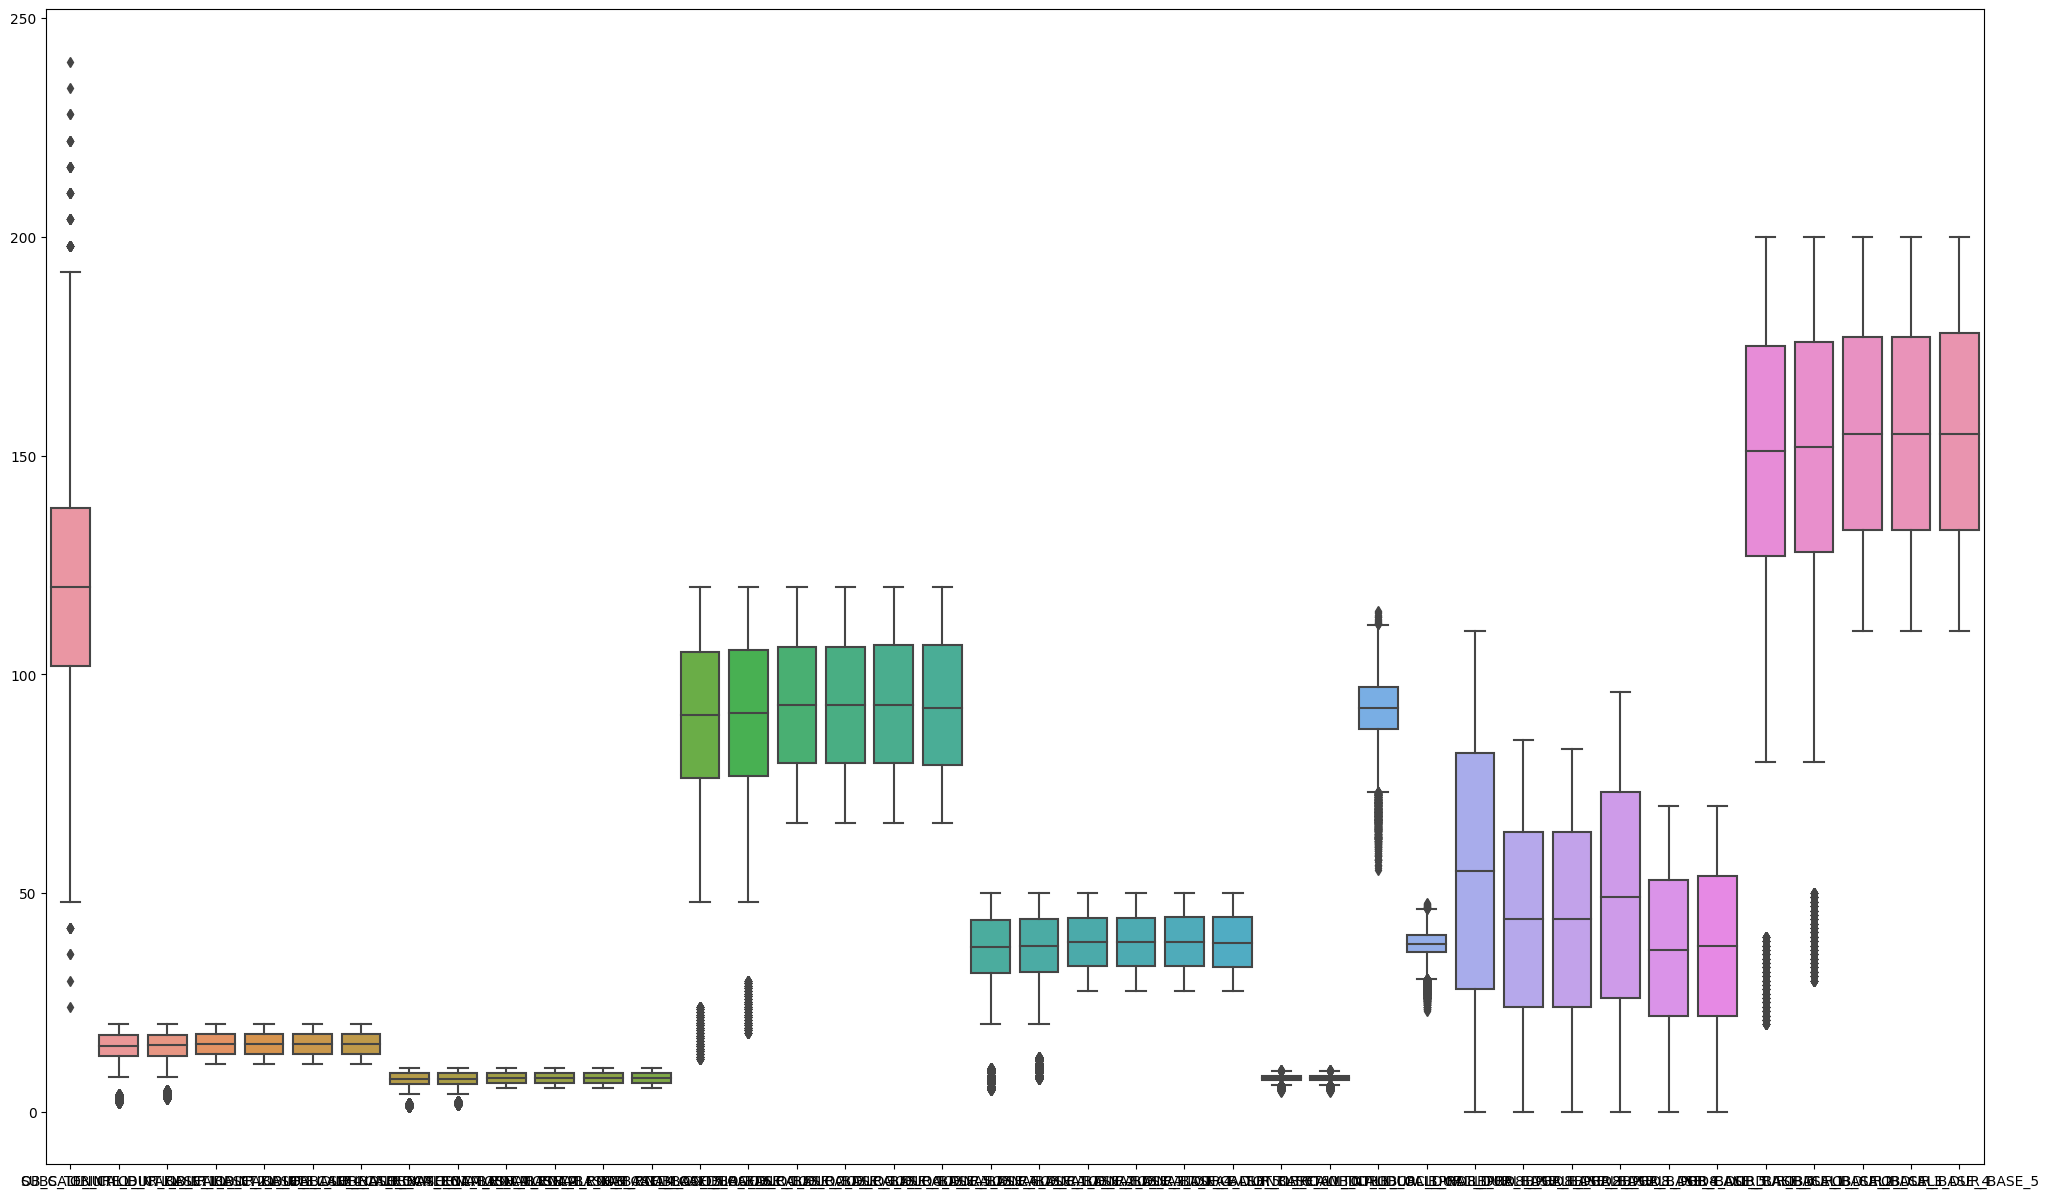

In [37]:
plt.figure(figsize  = (25,15))
sns.boxplot(data = telecom_df_numdata[telecom_df_numdata.columns[0:40]])  

Plot the boxplot for remaining numeric data. For columns 40 to 96 in telecom_df_numdata, outliers are treated using 1.5IQR method

<AxesSubplot: >

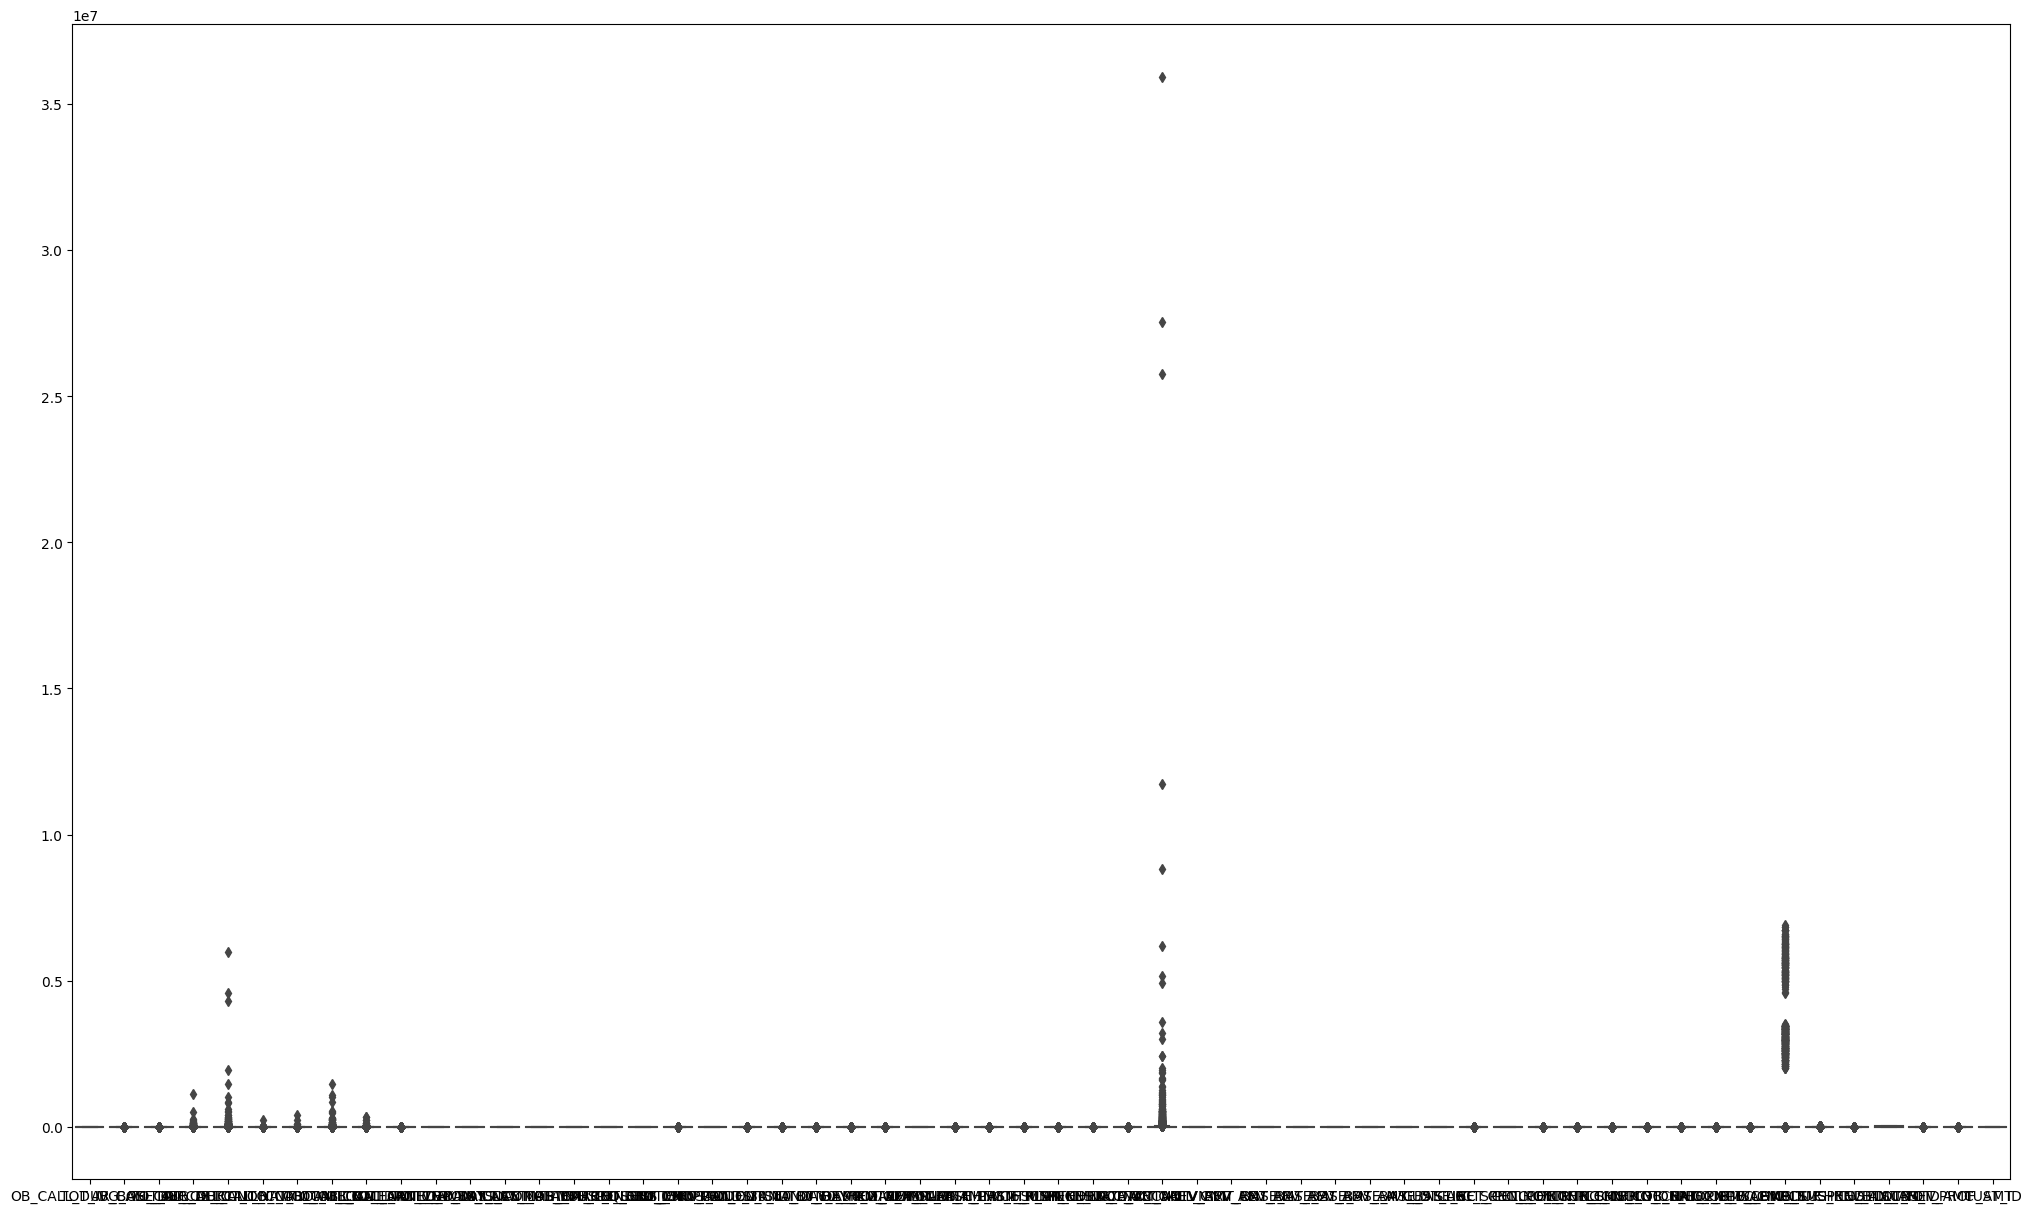

In [38]:
plt.figure(figsize  = (25,15))
sns.boxplot(data = telecom_df_numdata[telecom_df_numdata.columns[40:96]])  

Check the distribution of TOT_PROF_AMT. Outliers need to be replaced with max and min value in the range [Q1_1.5IQR,Q3+1.5IQR]

<AxesSubplot: xlabel='TOT_PROF_AMT', ylabel='Count'>

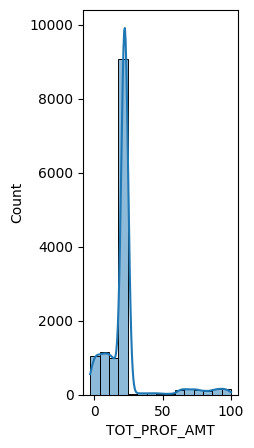

In [39]:
plt.figure(figsize=(2,5))
sns.histplot(telecom_df_numdata['TOT_PROF_AMT'],kde= True)

Find quantiles and IQR for first 40 features of numeric data. Set the upper bound as Q3 +1.5*IQR and lower bound as Q1-1.5*IQR

In [40]:
Q1 = telecom_df_numdata.quantile(0.25)
Q3= telecom_df_numdata.quantile(0.75)
IQR = Q3 - Q1
print("Q1 = " +str(Q1))
print("Q3 = " +str(Q3))
print("IQR = " +str(IQR))
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR 

Q1 = SUBS_TENURE                 102.000000
OB_CALL_INTL_DUR_BASE_1      12.700000
OB_CALL_INTL_DUR_BASE_2      12.800000
OB_CALL_INTL_DUR_BASE_3      13.300000
OB_CALL_INTL_DUR_BASE_4      13.300000
                              ...     
PCT_CHNG_BILL_AMT             0.823936
CUST_SUBS_ID               3299.750000
TOT_REV_AMT                  22.214628
TOT_PROF_AMT                 22.214628
CUST_ID                    1971.750000
Name: 0.25, Length: 96, dtype: float64
Q3 = SUBS_TENURE                 138.000000
OB_CALL_INTL_DUR_BASE_1      17.500000
OB_CALL_INTL_DUR_BASE_2      17.600000
OB_CALL_INTL_DUR_BASE_3      17.700000
OB_CALL_INTL_DUR_BASE_4      17.700000
                              ...     
PCT_CHNG_BILL_AMT             1.373761
CUST_SUBS_ID               9897.250000
TOT_REV_AMT                  22.214628
TOT_PROF_AMT                 22.214628
CUST_ID                    5833.250000
Name: 0.75, Length: 96, dtype: float64
IQR = SUBS_TENURE                  36.000000
OB_CALL_I

Replace outliers above upper bound with upper bound value and below lower bound with lower bound value. Use a for loop to apply the changes to each feature

In [41]:
for (i,column) in enumerate (telecom_df_numdata.columns):    
    telecom_df_numdata[column] = np.where(telecom_df_numdata[column] < lower_bound[i],lower_bound[i],np.where(telecom_df_numdata[column] > upper_bound[i],upper_bound[i],telecom_df_numdata[column] ))

Visualize the updated numeric data for first 40 features using box plot. All the outliers are replaced

<AxesSubplot: >

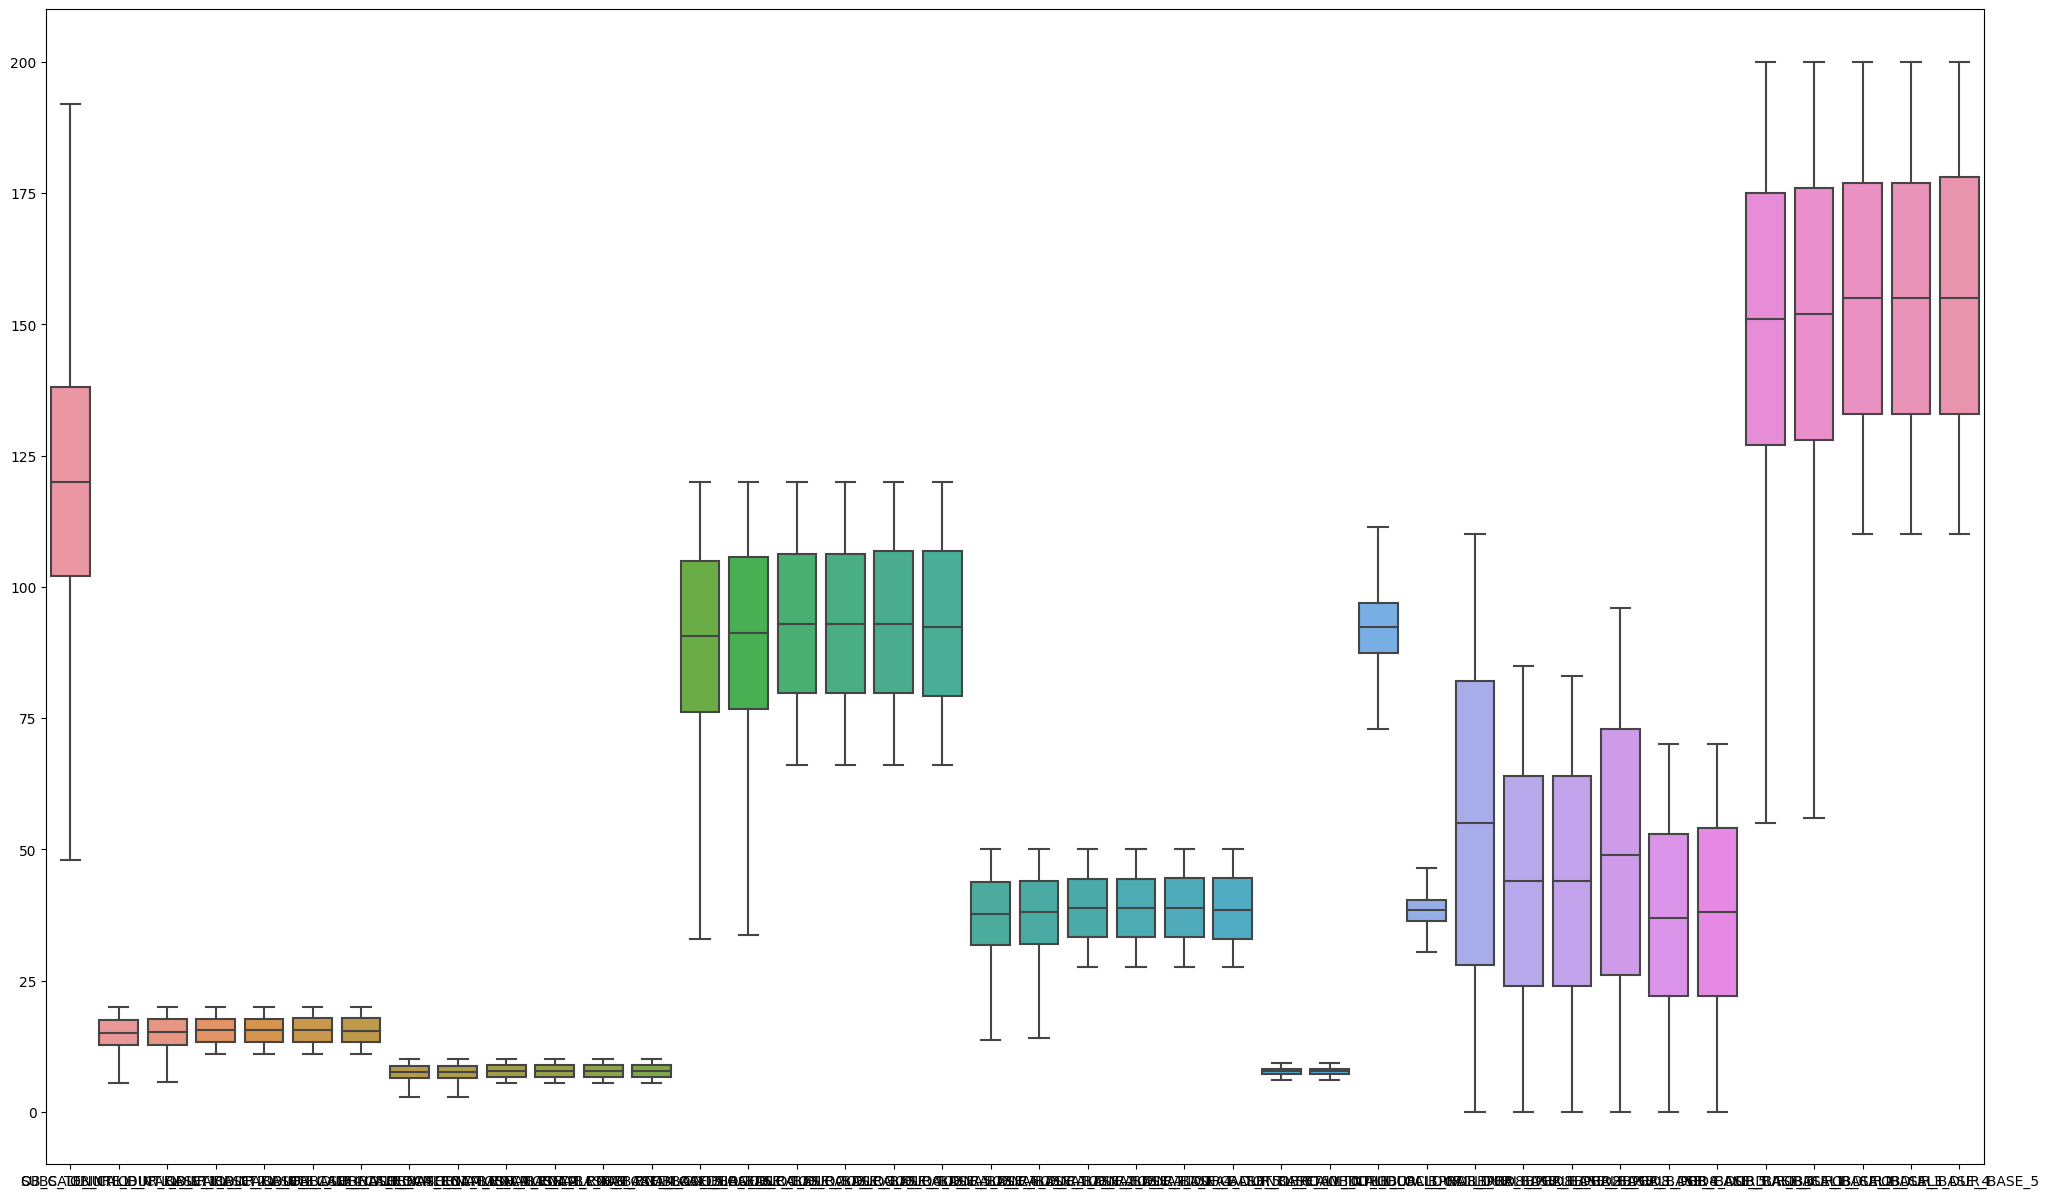

In [42]:
plt.figure(figsize  = (25,15))
sns.boxplot(data = telecom_df_numdata[telecom_df_numdata.columns[0:40]])


Plot the boxplot for the remaining numeric data. All the outliers are removed

<AxesSubplot: >

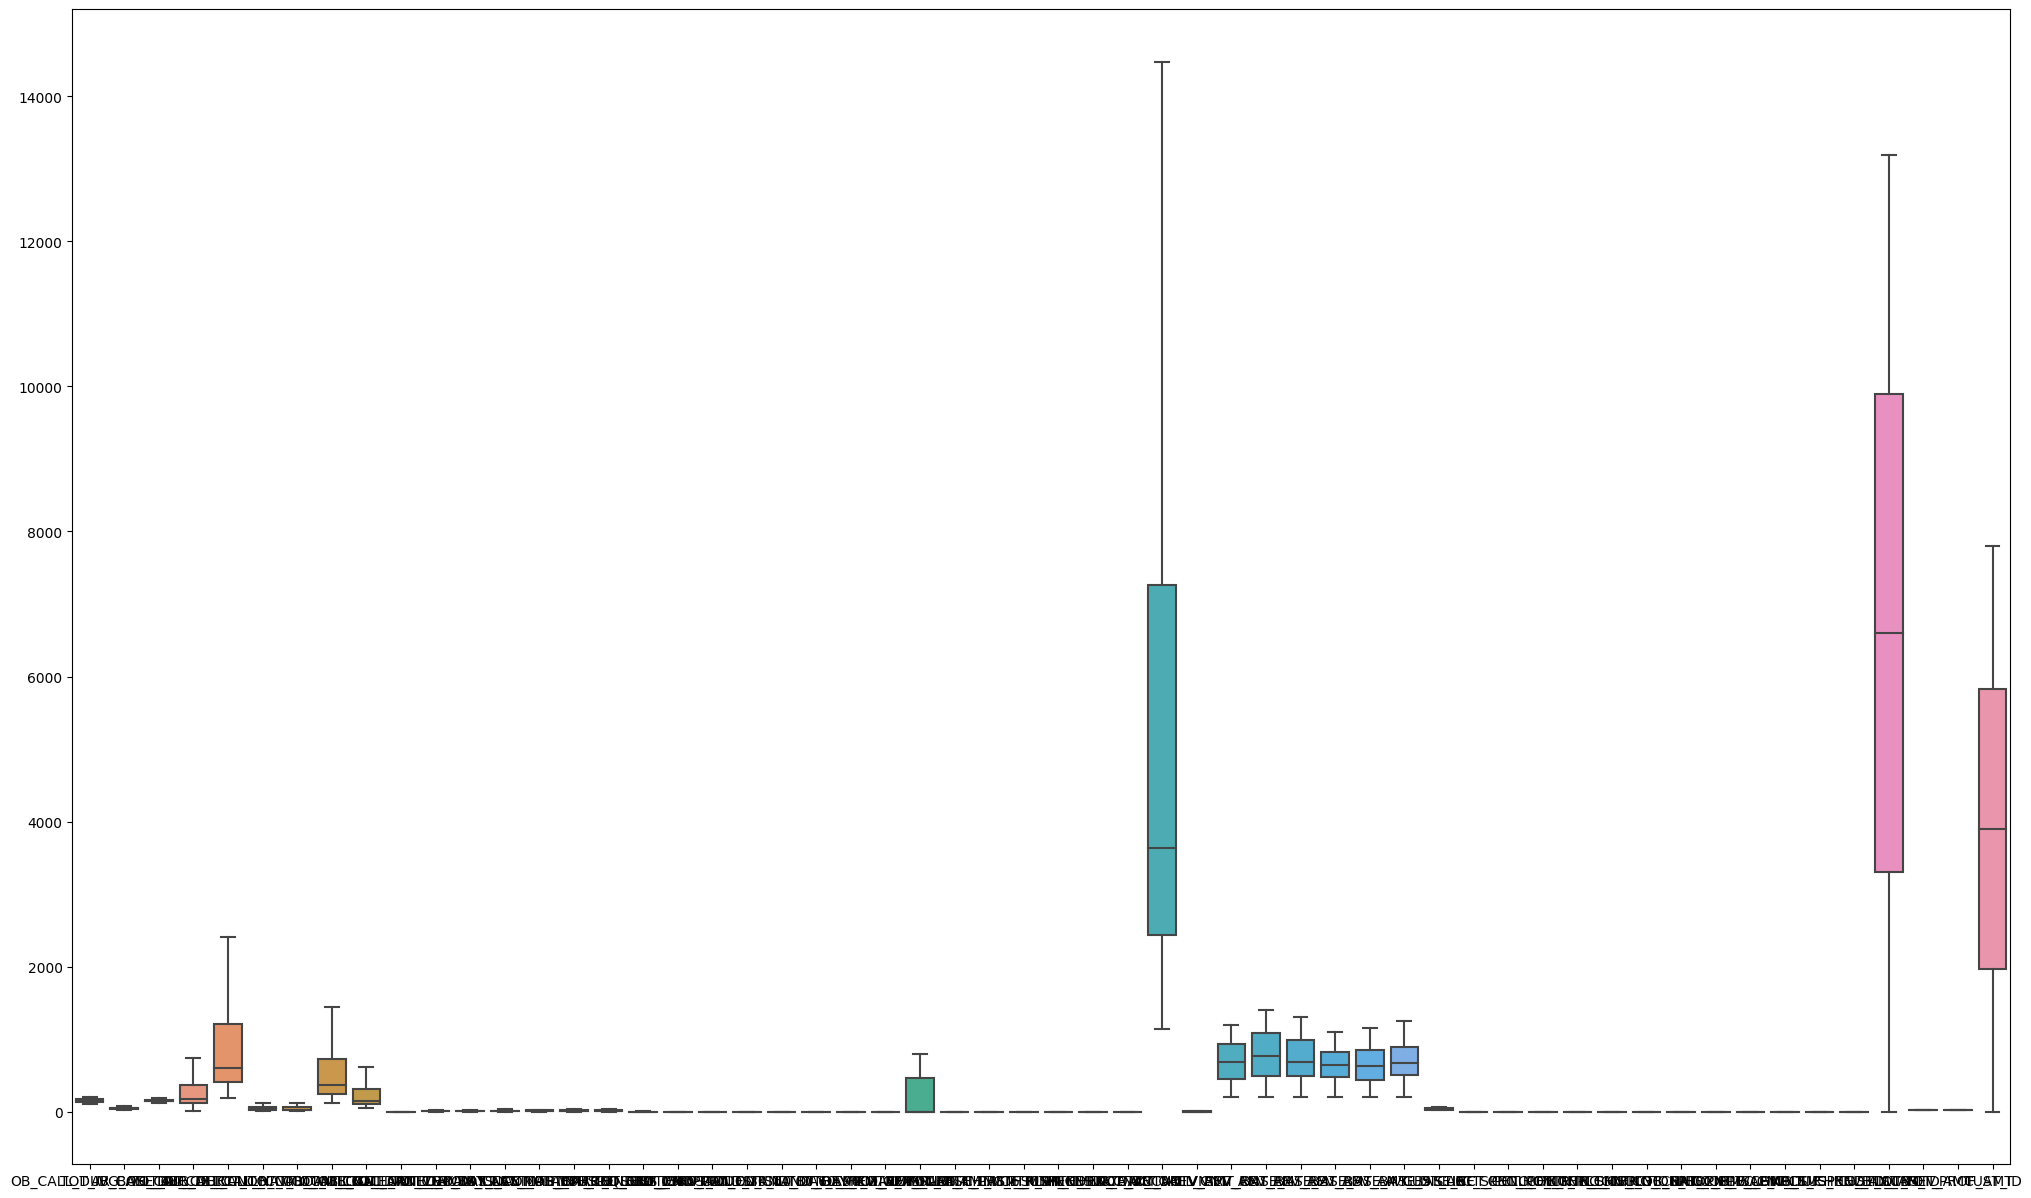

In [43]:
plt.figure(figsize  = (25,15))
sns.boxplot(data = telecom_df_numdata[telecom_df_numdata.columns[40:96]])  

Verify the telecom_df_numdata for changes

In [44]:
telecom_df_numdata.describe()

,SUBS_TENURE,OB_CALL_INTL_DUR_BASE_1,OB_CALL_INTL_DUR_BASE_2,OB_CALL_INTL_DUR_BASE_3,OB_CALL_INTL_DUR_BASE_4,OB_CALL_INTL_DUR_BASE_5,OB_CALL_INTL_DUR_BASE_6,OB_CALL_NAT_ROAM_CNT_BASE_1,OB_CALL_NAT_ROAM_CNT_BASE_2,OB_CALL_NAT_ROAM_CNT_BASE_3,...,PCT_CHNG_OB_LOC_SMS_CNT,PCT_CHNG_OB_WAP_CNT,PROPN_IB_LOW_DUR,RATIO_SPEC_SMS_SMS_REV_AMT,PCT_CHNG_SUSPENDED_CNT,PCT_CHNG_BILL_AMT,CUST_SUBS_ID,TOT_REV_AMT,TOT_PROF_AMT,CUST_ID
count,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,...,13196.000000,13196.000000,13196.000000,13196.0,13196.0,13196.000000,13196.000000,1.319600e+04,1.319600e+04,13196.000000
mean,119.794483,14.881320,14.938466,15.507752,15.486564,15.515080,15.492331,7.440660,7.469233,7.753876,...,0.976725,0.976725,0.922769,0.0,0.0,1.127987,6598.500000,2.221463e+01,2.221463e+01,3899.567824
std,26.901387,3.337941,3.317630,2.595205,2.587189,2.609266,2.608298,1.668971,1.658815,1.297602,...,0.177319,0.177319,0.511734,0.0,0.0,0.412252,3809.501411,3.552848e-15,3.552848e-15,2236.650159
min,48.000000,5.500000,5.600000,11.000000,11.000000,11.000000,11.000000,2.750000,2.800000,5.500000,...,0.540469,0.540469,0.000000,0.0,0.0,0.245428,1.000000,2.221463e+01,2.221463e+01,1.000000
25%,102.000000,12.700000,12.800000,13.300000,13.300000,13.300000,13.200000,6.350000,6.400000,6.650000,...,0.873424,0.873424,0.550543,0.0,0.0,0.823936,3299.750000,2.221463e+01,2.221463e+01,1971.750000
50%,120.000000,15.100000,15.200000,15.500000,15.500000,15.500000,15.400000,7.550000,7.600000,7.750000,...,0.984957,0.984957,0.823529,0.0,0.0,1.087538,6598.500000,2.221463e+01,2.221463e+01,3898.500000
75%,138.000000,17.500000,17.600000,17.700000,17.700000,17.800000,17.800000,8.750000,8.800000,8.850000,...,1.095395,1.095395,1.200000,0.0,0.0,1.373761,9897.250000,2.221463e+01,2.221463e+01,5833.250000
max,192.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,10.000000,10.000000,10.000000,...,1.428350,1.428350,2.174185,0.0,0.0,2.198500,13196.000000,2.221463e+01,2.221463e+01,7800.000000


Copy cleaned numeric data to orginal data frame telecom_df

In [45]:
telecom_df.iloc[:,churn_dict_df.loc[churn_dict_df["Type"] == 'Num'].index] = telecom_df_numdata

Check the shape of cleaned dataframe

In [46]:
telecom_df.shape

(13196, 108)

Check the descriptive statistics of data

In [47]:
telecom_df.describe()

,EDUCATION_CD,OCCUPATION_CAT_CD,SUBS_TENURE,OB_CALL_INTL_DUR_BASE_1,OB_CALL_INTL_DUR_BASE_2,OB_CALL_INTL_DUR_BASE_3,OB_CALL_INTL_DUR_BASE_4,OB_CALL_INTL_DUR_BASE_5,OB_CALL_INTL_DUR_BASE_6,OB_CALL_NAT_ROAM_CNT_BASE_1,...,PCT_CHNG_OB_WAP_CNT,PROPN_IB_LOW_DUR,RATIO_SPEC_SMS_SMS_REV_AMT,PCT_CHNG_SUSPENDED_CNT,PCT_CHNG_BILL_AMT,CUST_SUBS_ID,TOT_REV_AMT,TOT_PROF_AMT,CUST_ID,CHURN_FLG
count,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,...,13196.000000,13196.000000,13196.0,13196.0,13196.000000,13196.000000,1.319600e+04,1.319600e+04,13196.000000,13196.000000
mean,1.718172,22.336693,119.794483,14.881320,14.938466,15.507752,15.486564,15.515080,15.492331,7.440660,...,0.976725,0.922769,0.0,0.0,1.127987,6598.500000,2.221463e+01,2.221463e+01,3899.567824,0.082677
std,0.698012,22.048575,26.901387,3.337941,3.317630,2.595205,2.587189,2.609266,2.608298,1.668971,...,0.177319,0.511734,0.0,0.0,0.412252,3809.501411,3.552848e-15,3.552848e-15,2236.650159,0.275403
min,1.000000,1.000000,48.000000,5.500000,5.600000,11.000000,11.000000,11.000000,11.000000,2.750000,...,0.540469,0.000000,0.0,0.0,0.245428,1.000000,2.221463e+01,2.221463e+01,1.000000,0.000000
25%,1.000000,10.000000,102.000000,12.700000,12.800000,13.300000,13.300000,13.300000,13.200000,6.350000,...,0.873424,0.550543,0.0,0.0,0.823936,3299.750000,2.221463e+01,2.221463e+01,1971.750000,0.000000
50%,2.000000,10.000000,120.000000,15.100000,15.200000,15.500000,15.500000,15.500000,15.400000,7.550000,...,0.984957,0.823529,0.0,0.0,1.087538,6598.500000,2.221463e+01,2.221463e+01,3898.500000,0.000000
75%,2.000000,25.000000,138.000000,17.500000,17.600000,17.700000,17.700000,17.800000,17.800000,8.750000,...,1.095395,1.200000,0.0,0.0,1.373761,9897.250000,2.221463e+01,2.221463e+01,5833.250000,0.000000
max,7.000000,99.000000,192.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,10.000000,...,1.428350,2.174185,0.0,0.0,2.198500,13196.000000,2.221463e+01,2.221463e+01,7800.000000,1.000000


Verify the cleaned dataframe entries 

In [48]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13196 entries, 0 to 13195
Columns: 108 entries, GENDER_CD to CHURN_FLG
dtypes: float64(98), int64(8), object(2)
memory usage: 10.9+ MB


Verify all null values are removed

In [50]:
telecom_df.isnull().sum()

GENDER_CD                  0
EDUCATION_CD               0
OCCUPATION_CAT_CD          0
SUBS_TENURE                0
OB_CALL_INTL_DUR_BASE_1    0
                          ..
TOT_REV_AMT                0
TOT_PROF_AMT               0
CUST_ID                    0
name                       0
CHURN_FLG                  0
Length: 108, dtype: int64

Save the cleaned file to telecom_churn_cleaned.csv

In [51]:
telecom_df.to_csv(r"C:\Users\eliza\OneDrive\Desktop\Python Training\telecom_churn_cleaned.csv")